In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
screening_metrics = {'Total_Screened': 722714} 
potential_savings_sar = 1160000000 
USD_TO_SAR = 3.75

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'


>>> STEP 6: RUNNING ADVANCED ECONOMIC MODELS...
   -> Direct Medical Cost (MoH): 121.5 B SAR
   -> Indirect Economic Loss (GDP): 81.0 B SAR
   -> Total Societal Burden: 202.5 B SAR
   -> Break-Even Screening Cost: 1605.06 SAR per person
      (If screening costs less than this, the project is PROFITABLE)


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_19428\847576193.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dept, x='Share', y='Department', palette='viridis', ax=ax2)


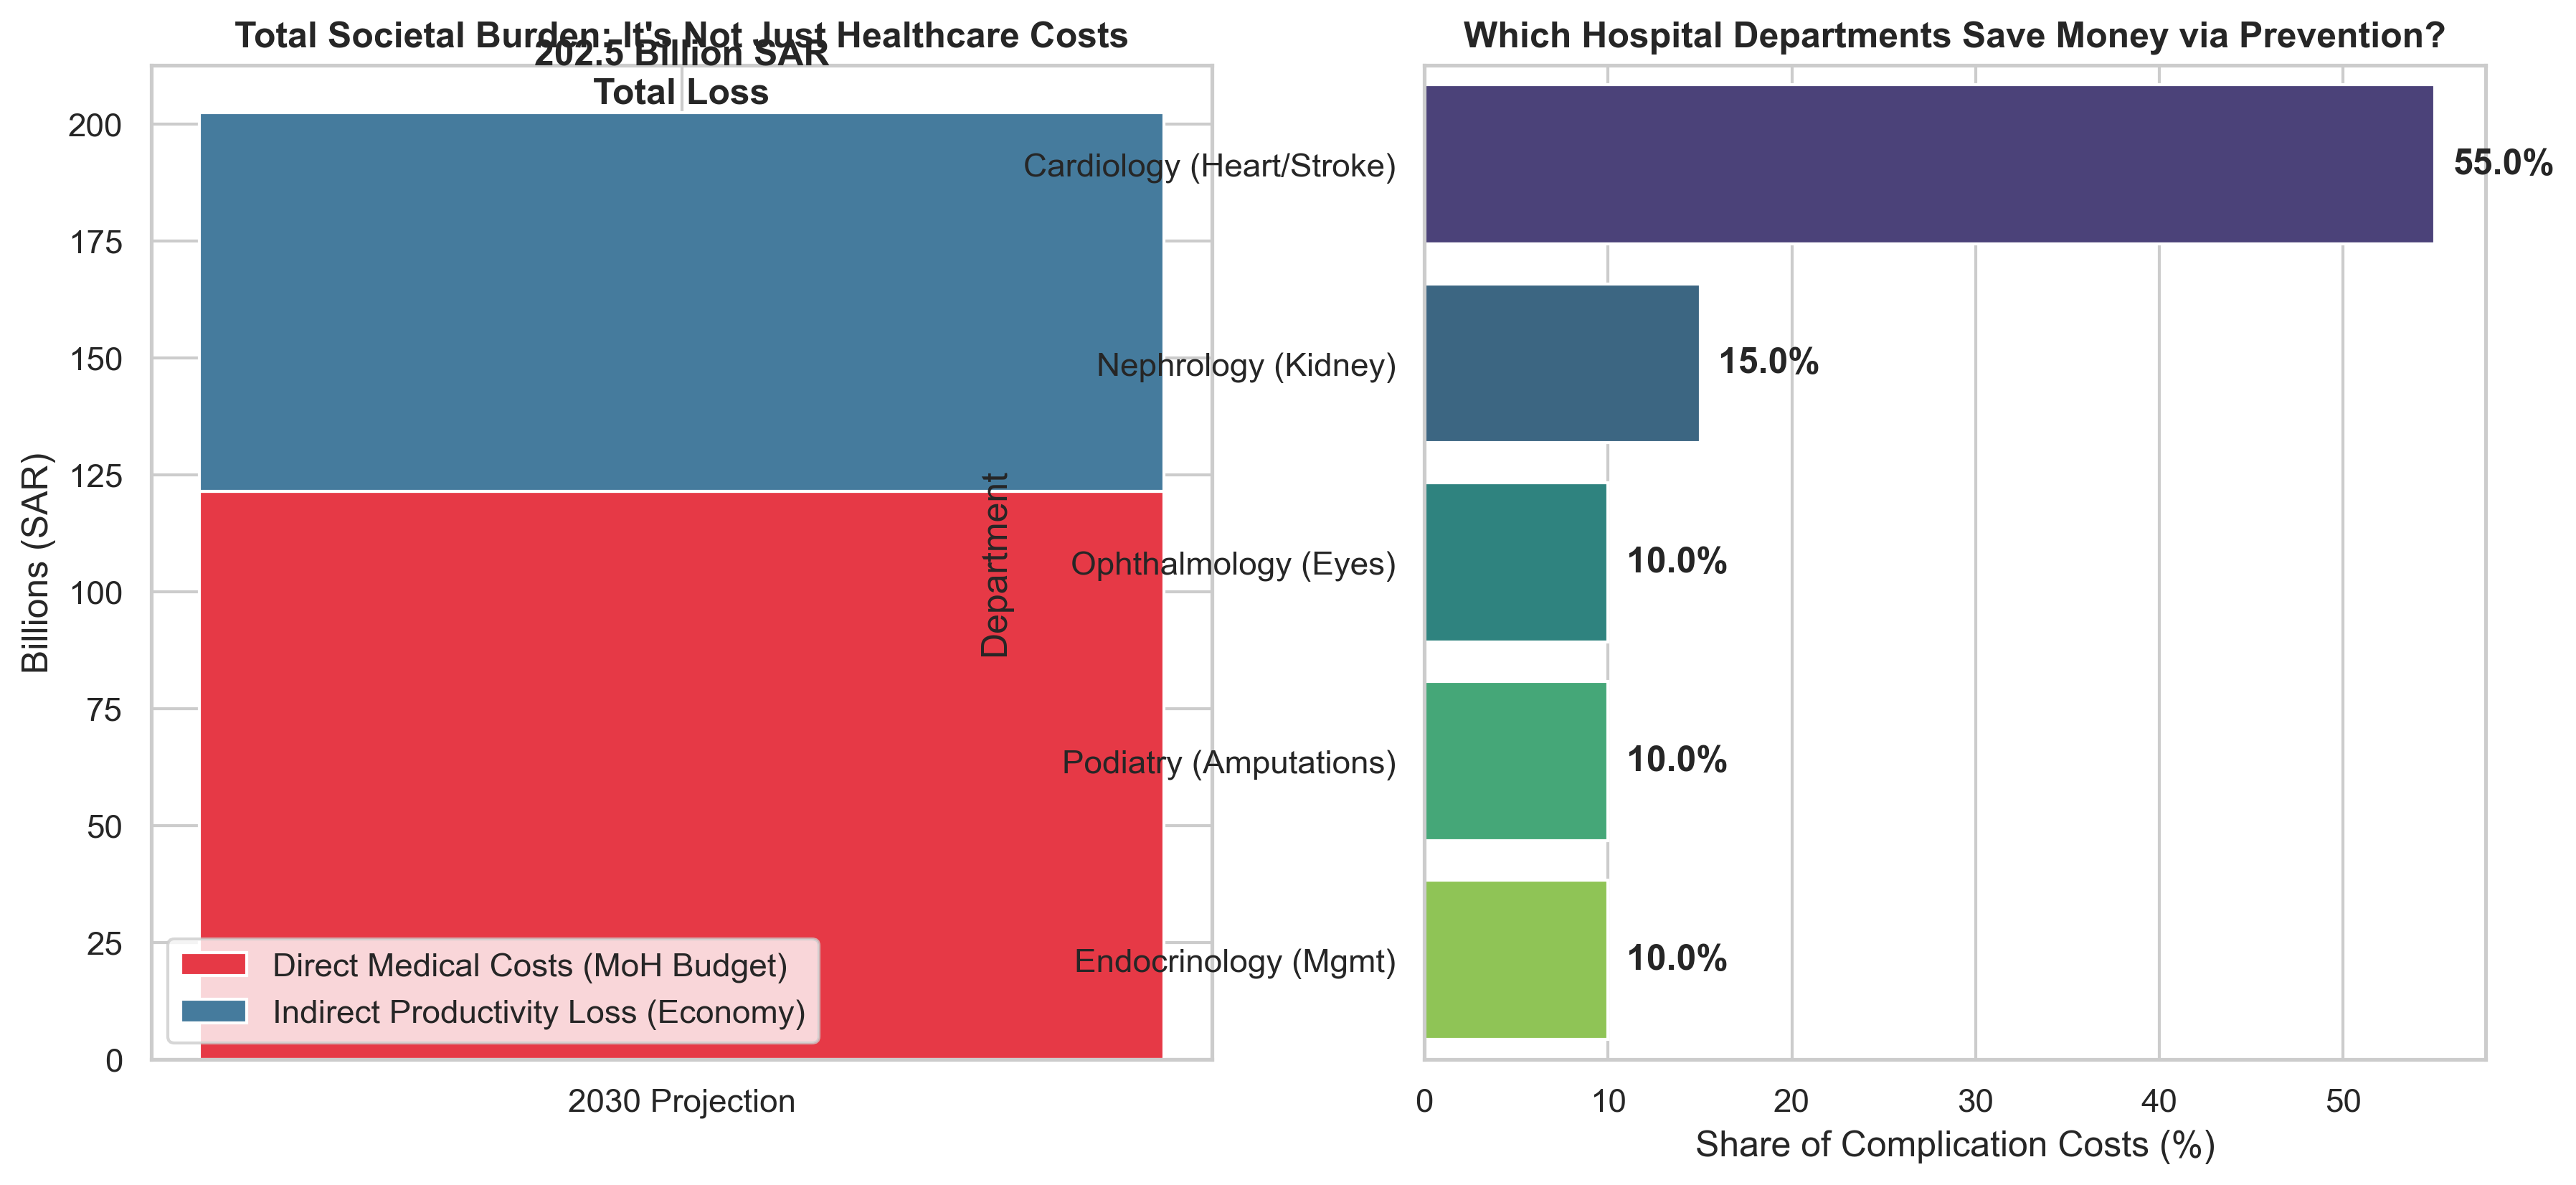

In [ ]:
print("\n>>> STEP 6: RUNNING ADVANCED ECONOMIC MODELS...")


indirect_cost_ratio = 40 / 60

direct_cost_2030 = 32.4 * 3.75 # 121.5 Billion SAR
indirect_cost_2030 = direct_cost_2030 * indirect_cost_ratio
total_societal_cost_2030 = direct_cost_2030 + indirect_cost_2030

print(f"   -> Direct Medical Cost (MoH): {direct_cost_2030:.1f} B SAR")
print(f"   -> Indirect Economic Loss (GDP): {indirect_cost_2030:.1f} B SAR")
print(f"   -> Total Societal Burden: {total_societal_cost_2030:.1f} B SAR")


break_even_cost = potential_savings_sar / screening_metrics['Total_Screened']

print(f"   -> Break-Even Screening Cost: {break_even_cost:.2f} SAR per person")
print(f"      (If screening costs less than this, the project is PROFITABLE)")


dept_costs = {
    'Cardiology (Heart/Stroke)': 55, 
    'Nephrology (Kidney)': 15,
    'Ophthalmology (Eyes)': 10,
    'Podiatry (Amputations)': 10,
    'Endocrinology (Mgmt)': 10
}
df_dept = pd.DataFrame(list(dept_costs.items()), columns=['Department', 'Share'])




fig_adv, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


labels = ['2030 Projection']
direct = [direct_cost_2030]
indirect = [indirect_cost_2030]

ax1.bar(labels, direct, label='Direct Medical Costs (MoH Budget)', color='#e63946')
ax1.bar(labels, indirect, bottom=direct, label='Indirect Productivity Loss (Economy)', color='#457b9d')

ax1.set_title('Total Societal Burden: It\'s Not Just Healthcare Costs', fontweight='bold')
ax1.set_ylabel('Billions (SAR)')
ax1.legend()

total_val = direct[0] + indirect[0]
ax1.text(0, total_val + 2, f'{total_val:.1f} Billion SAR\nTotal Loss', ha='center', fontweight='bold', fontsize=12)


sns.barplot(data=df_dept, x='Share', y='Department', palette='viridis', ax=ax2)
ax2.set_title('Which Hospital Departments Save Money via Prevention?', fontweight='bold')
ax2.set_xlabel('Share of Complication Costs (%)')

for i, p in enumerate(ax2.patches):
    width = p.get_width()
    ax2.text(width + 1, p.get_y() + p.get_height()/2, f'{width}%', va='center', fontweight='bold')

#save_plot('Page6_Advanced_Economic_Analysis.png')

>>> STEP 6: RE-GENERATING ADVANCED VISUALIZATIONS...


c:\Users\DSC-GDP075\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\DSC-GDP075\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


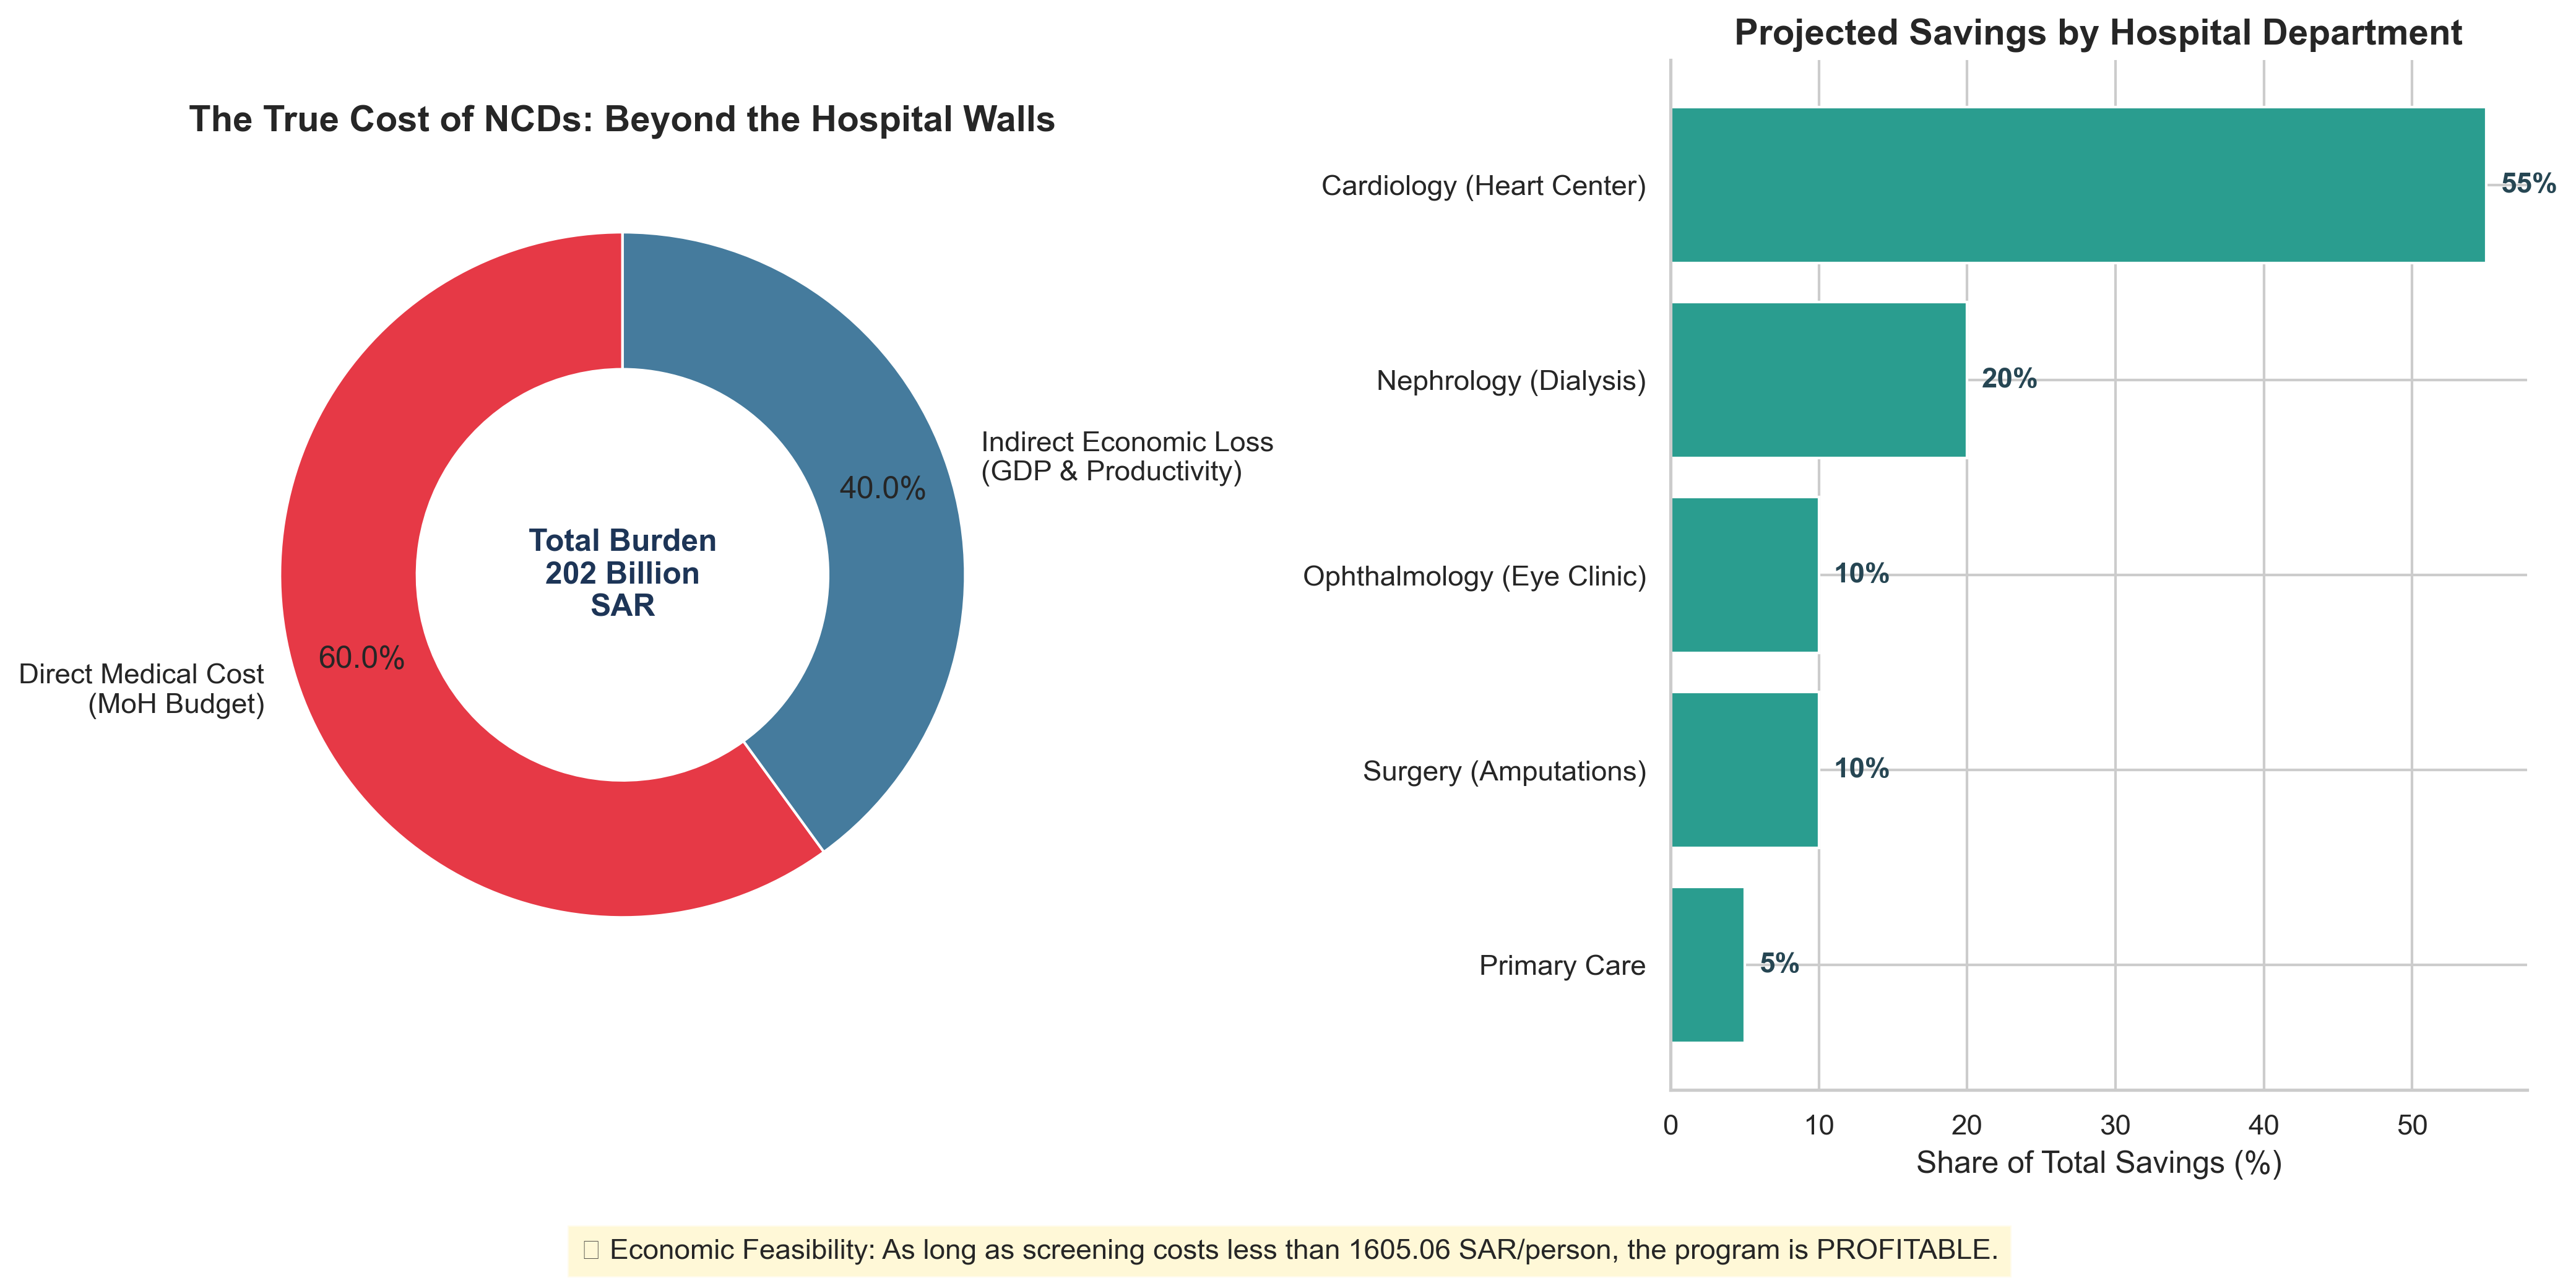

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()


if 'ncd_cost_2030' not in locals():
    ncd_cost_2030 = 121.5 
if 'potential_savings_sar' not in locals():
    
    potential_savings_sar = 1200000000 
if 'screening_metrics' not in locals():
    screening_metrics = {'Total_Screened': 722714}


print(">>> STEP 6: RE-GENERATING ADVANCED VISUALIZATIONS...")


# المصدر: Alshammari et al. (Indirect costs ~ 40% of TOTAL expenses)
# إذا كانت التكلفة المباشرة (Direct) تمثل 60%، وغير المباشرة (Indirect) تمثل 40%
# التكلفة المباشرة (NCD Cost 2030) = 121.5 مليار ريال
# التكلفة غير المباشرة = (121.5 / 0.60) * 0.40 = 81 مليار ريال
indirect_cost_2030 = (ncd_cost_2030 / 0.60) * 0.40
total_societal_cost = ncd_cost_2030 + indirect_cost_2030

break_even_cost = potential_savings_sar / screening_metrics['Total_Screened']

dept_data = {
    'Department': ['Cardiology (Heart Center)', 'Nephrology (Dialysis)', 'Ophthalmology (Eye Clinic)', 'Surgery (Amputations)', 'Primary Care'],
    'Savings_Share': [55, 20, 10, 10, 5] 
}
df_dept = pd.DataFrame(dept_data)
df_dept = df_dept.sort_values('Savings_Share', ascending=True) 



fig6, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

labels = ['Direct Medical Cost\n(MoH Budget)', 'Indirect Economic Loss\n(GDP & Productivity)']
sizes = [ncd_cost_2030, indirect_cost_2030]
colors = ['#e63946', '#457b9d'] # أحمر للميزانية، أزرق للاقتصاد

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   startangle=90, colors=colors, pctdistance=0.80, 
                                   wedgeprops=dict(width=0.4, edgecolor='w'))

ax1.text(0, 0, f'Total Burden\n{total_societal_cost:.0f} Billion\nSAR', 
         ha='center', va='center', fontsize=12, fontweight='bold', color='#1d3557')

ax1.set_title('The True Cost of NCDs: Beyond the Hospital Walls', fontsize=14, fontweight='bold')


bars = ax2.barh(df_dept['Department'], df_dept['Savings_Share'], color='#2a9d8f')

ax2.set_title('Projected Savings by Hospital Department', fontsize=14, fontweight='bold')
ax2.set_xlabel('Share of Total Savings (%)')

for bar in bars:
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width}%', va='center', fontweight='bold', fontsize=11, color='#264653')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.figtext(0.5, 0.02, 
            f"💡 Economic Feasibility: As long as screening costs less than {break_even_cost:.2f} SAR/person, the program is PROFITABLE.", 
            ha="center", fontsize=11, bbox={"facecolor":"#fff3b0", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 

#save_plot('Page6_Advanced_Economic_Analysis_V2.png')